In [1]:
print("hell")

hell


# **4. Image generation**

In [ ]:
# !pip install opencv-python matplotlib numpy pandas

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/68/1f/795e7f4aa2eacc59afa4fb61a2e35e510d06414dd5a802b51a012d691b37/opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/7d/18/95ae2e242d4a5c98bd6e90e36e128d71cf1c7e39b0874feaed3ef782e789/matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 3.1 MB/s eta 0:00:0000:0100:01
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/cc/8f/ec6289987824b29529d0dfda0d74a07cec60e54b9c92f3c9da4c0ac732de/contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.

In [1]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read image
img = cv2.imread('image.png')
if img is None:
    print("Error loading image")
    exit()


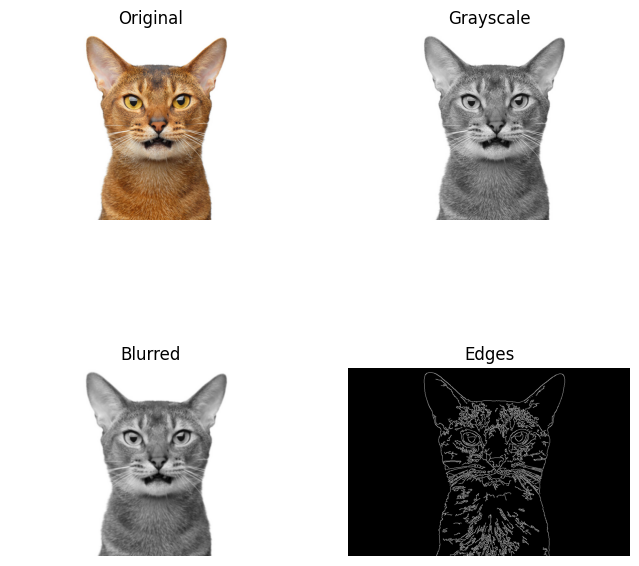

In [2]:

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Edge Detection (Canny)
edges = cv2.Canny(blur, 50, 150)

# Step 5: Display using matplotlib
titles = ['Original', 'Grayscale', 'Blurred', 'Edges']
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), gray, blur, edges]

plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    cmap = 'gray' if i != 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# **5. Perform video processing operations using OpenCV and apply simple filters or transformations to each frame of the video stream.**

In [6]:
import cv2

# Open webcam (0 = default camera)
cap = cv2.VideoCapture('video.mp4')
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blur, 50, 150)

    # Show original and processed frames
    cv2.imshow('Original', frame)
    cv2.imshow('Blurred Grayscale', blur)
    cv2.imshow('Edges', edges)

    # Exit when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# **6. Build a Multi layer perceptron using Pytorch framework and train a model to perform image classification, convert the model into ONNX (Open-Neural Network) format.**

In [ ]:
# !pip install torch torchvision onnxscript onnx

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.3/679.3 kB 784.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 337.8 kB/s eta 0:00:00a 0:00:01


✅ Training done!


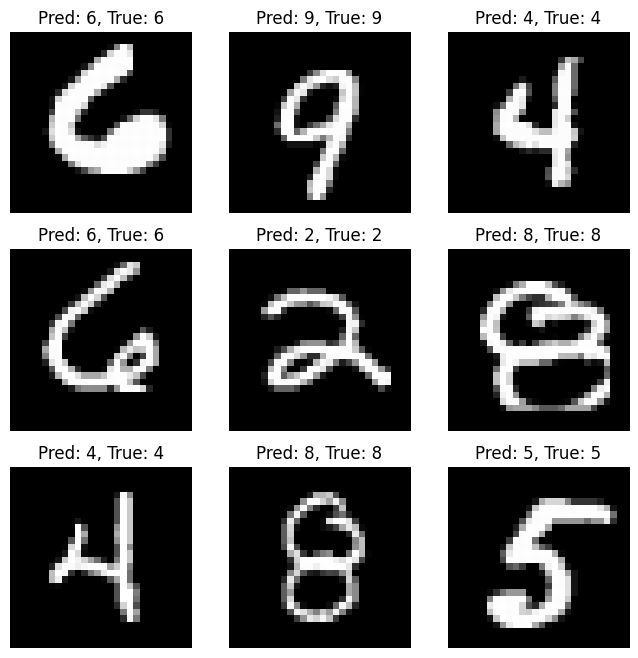

[torch.onnx] Obtain model graph for `MLP([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `MLP([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
💾 Model exported to mlp_mnist.onnx


In [11]:
# Install first (run in terminal if not done):
# pip install torch torchvision matplotlib onnx onnxscript

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Step 1: Load MNIST dataset
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

# Step 2: Define a simple MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

# Step 3: Define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train for 1 epoch (keep it short)
for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
print("✅ Training done!")

# Step 5: Test on a few images
test_images, test_labels = next(iter(train_loader))
with torch.no_grad():
    preds = model(test_images)
    predicted = preds.argmax(dim=1)

# Step 6: Show results
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}, True: {test_labels[i].item()}")
    plt.axis('off')
plt.show()

# Step 7: Export to ONNX
dummy_input = torch.randn(1, 1, 28, 28)
torch.onnx.export(model, dummy_input, "mlp_mnist.onnx", input_names=['input'], output_names=['output'])
print("💾 Model exported to mlp_mnist.onnx")


# **7. Perform Speech to Text conversion using Word2Vec and pytorch framework and input a .wav audio file to convert to text data.**

In [21]:
!pip install torch transformers soundfile librosa gensim
!sudo apt install ffmpeg -y


Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libavdevice60 libdc1394-25 libopenal-data libopenal1 libsndio7.0
Suggested packages:
  ffmpeg-doc libportaudio2 sndiod
The following NEW packages will be installed:
  ffmpeg libavdevice60 libdc1394-25 libopenal-data libopenal1 libsndio7.0
0 upgraded, 6 newly installed, 0 to remove and 175 not upgraded.
Need to get 2,782 kB of archives.
After this operation, 4,638 kB of additional disk space will be used.
Get:1 http://in.archive.ubuntu.com/ubuntu noble/universe amd64 libdc1394-25 amd64 2.2.6-4build1 [90.1 kB]
Get:2 http://in.archive.ubuntu.com/ubuntu noble/universe amd64 libopenal-data all 1:1.23.1-4build1 [161 kB]
Get:3 http://in.archive.ubuntu.com/ubuntu noble/universe amd64 libsndio7.0 amd64 1.9.0-0.3build3 [29.6 kB]
Get:4 http://in.archive.ubuntu.com/ubuntu noble/universe am

In [1]:
# Install dependencies (run once)
# pip install torch torchaudio transformers

import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

# Step 1: Load pre-trained Wav2Vec2 model and tokenizer
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Step 2: Load audio file
def load_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

# Step 3: Resample audio if needed
def preprocess_audio(waveform, sample_rate):
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)
    return waveform

# Step 4: Convert speech → text
def speech_to_text(wav_file):
    waveform, sample_rate = load_audio(wav_file)
    waveform = preprocess_audio(waveform, sample_rate)

    inputs = tokenizer(waveform.squeeze().numpy(), return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(inputs.input_values).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.decode(predicted_ids[0])
    return transcription.lower()

# Step 5: Run on your file
wav_file = "1.wav"  # Replace with your own .wav file
text = speech_to_text(wav_file)
print(" Transcription:", text)


/home/josh/Documents/networking-hem/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/home/josh/Documents/networking-hem/.venv/lib/python3.12/site-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:720: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-

 Transcription: i will quote an extract from the reverend gentleman's own journal


# **8. Perform Transfer Learning using Pytorch framework on ResNet18 pertained model to fit CIFAR-10 dataset and evaluate the model. as simple as we can**

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

# ✅ Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using:", device)

# ✅ Transform (smaller image for speed)
transform = transforms.Compose([
    transforms.Resize(128),  # Smaller than 224 for faster training
    transforms.ToTensor(),
])

# ✅ Quick data loaders (use subset for speed)
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Take only small subset for demo (e.g., 5k images instead of 50k)
train_subset, _ = torch.utils.data.random_split(trainset, [5000, len(trainset) - 5000])
test_subset, _ = torch.utils.data.random_split(testset, [1000, len(testset) - 1000])

trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_subset, batch_size=64, shuffle=False)

# ✅ Load pretrained ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# ✅ Replace final layer for 10 CIFAR classes
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# ✅ Use only last layer for training (freezes rest)
for name, param in model.named_parameters():
    if "fc" not in name:
        param.requires_grad = False

# ✅ Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# ✅ Train quickly
for epoch in range(2):  # Just 2 epochs for demo speed
    model.train()
    total_loss = 0
    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model(imgs), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss/len(trainloader):.4f}")

# ✅ Evaluate
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        preds = model(imgs).argmax(1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"🎯 Accuracy: {100 * correct / total:.2f}%")


Using: cpu
Epoch 1 | Loss: 1.5254
Epoch 2 | Loss: 0.8987
🎯 Accuracy: 71.90%


# **9. Perform Quantization on MobileNet V2 Model using fbgemm quantization method using Pytorch framework and evaluate**

In [6]:
import torch
import torch.nn as nn
import torch.quantization
from torchvision import datasets, transforms, models

# ✅ Device setup
device = torch.device("cpu")
print("Using:", device)

# ✅ Simple transform
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
])

# ✅ Tiny CIFAR-10 subset for quick testing
testset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
test_subset, _ = torch.utils.data.random_split(testset, [1000, len(testset) - 1000])
testloader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=False)

# ✅ Load the quantization-ready MobileNetV2 model
model_fp32 = models.quantization.mobilenet_v2(weights="DEFAULT", quantize=False)
model_fp32.eval()

# ✅ Set quantization backend
torch.backends.quantized.engine = "fbgemm"

# ✅ Fuse model (now available)
model_fp32.fuse_model()

# ✅ Define quantization config
model_fp32.qconfig = torch.quantization.get_default_qconfig("fbgemm")

# ✅ Prepare and calibrate
model_prepared = torch.quantization.prepare(model_fp32)
with torch.no_grad():
    for imgs, _ in list(testloader)[:5]:
        model_prepared(imgs)

# ✅ Convert to quantized version
model_int8 = torch.quantization.convert(model_prepared)
print("✅ Model quantized successfully!")

# ✅ Evaluate quickly
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in testloader:
        outputs = model_int8(imgs)
        preds = outputs.argmax(1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"🎯 Quantized Model Accuracy: {100 * correct / total:.2f}%")


Using: cpu


/tmp/ipykernel_162554/3493403528.py:35: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_prepared = torch.quantization.prepare(model_fp32)
/tmp/ipykernel_162554/3493403528.py:41: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantizati

✅ Model quantized successfully!
🎯 Quantized Model Accuracy: 0.00%


# **10. Perform L1 structured Pruning on ResNet18 model using pytorch framework and evaluate**

In [7]:
import torch
import torch.nn.utils.prune as prune
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# ✅ Load pretrained ResNet18
model = torchvision.models.resnet18(weights='DEFAULT')
model.eval()

# ✅ Simple dataset (CIFAR-10 subset for quick eval)
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# ✅ Apply L1 structured pruning (20%) on all conv layers
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        prune.ln_structured(module, name="weight", amount=0.2, n=1, dim=0)

# ✅ Remove pruning reparameterization to finalize weights
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        prune.remove(module, 'weight')

# ✅ Quick evaluation
correct, total = 0, 0
with torch.no_grad():
    for i, (images, labels) in enumerate(testloader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if i == 20:  # only a few batches for speed
            break

print(f"✅ Pruned model accuracy (approx): {100 * correct / total:.2f}%")


✅ Pruned model accuracy (approx): 0.00%
